## Minimal Example on text2img with Pivotal Tuning


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

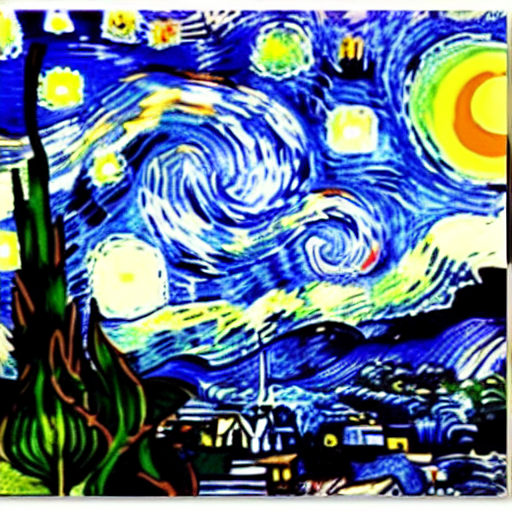

In [59]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda:0"
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

prompt = "game character <krk> in background of starry night by van gogh"
torch.manual_seed(0)
image = pipe(prompt, num_inference_steps=50, guidance_scale=7).images[0]

image  # nice, but that's the base model.


LoRA : Patching Unet
LoRA : Patching text encoder
LoRA : Patching token input
The tokenizer already contains the token <krk>.
Replacing <krk> embedding.


  0%|          | 0/50 [00:00<?, ?it/s]

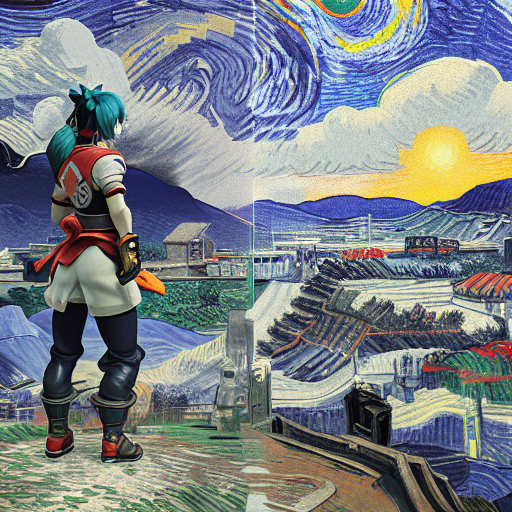

In [63]:
from lora_diffusion import patch_pipe, tune_lora_scale, extract_lora_ups_down

# print(torch.load("/home/simo/dl/lora-diffusion/exps/output_example_ffl/step_200.pt"))
prompt = "game character <krk> in background of starry night by van gogh"
patch_pipe(
    pipe, "../lora_kiriko2.pt", "<krk>", patch_text=True, patch_ti=True
)  # , unet_target_replace_module = ["CrossAttention", "Attention"])
tune_lora_scale(pipe.unet, 0.9)
tune_lora_scale(pipe.text_encoder, 1.0)

pipe.safety_checker = None
torch.manual_seed(0)
image = pipe(prompt, num_inference_steps=50, guidance_scale=6).images[0]

image 


  0%|          | 0/50 [00:00<?, ?it/s]

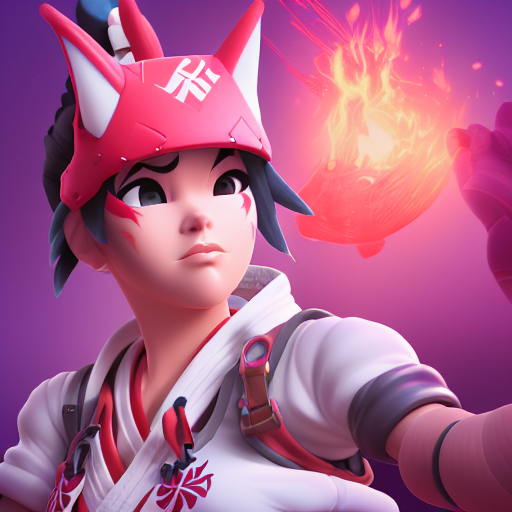

In [65]:
tune_lora_scale(pipe.unet, 0.9)
tune_lora_scale(pipe.text_encoder, 1.0)
torch.manual_seed(0)
prompt = "high detail 3d render of <krk>, Skill magic geek inside matrix deepdream radiating a glowing aura stuff loot legends stylized digital illustration video game icon artstation lois van baarle, ilya kuvshinov, rossdraws"

pipe.safety_checker = None
image = pipe(prompt, num_inference_steps=50, guidance_scale=6.0).images[0]
image


  0%|          | 0/50 [00:00<?, ?it/s]

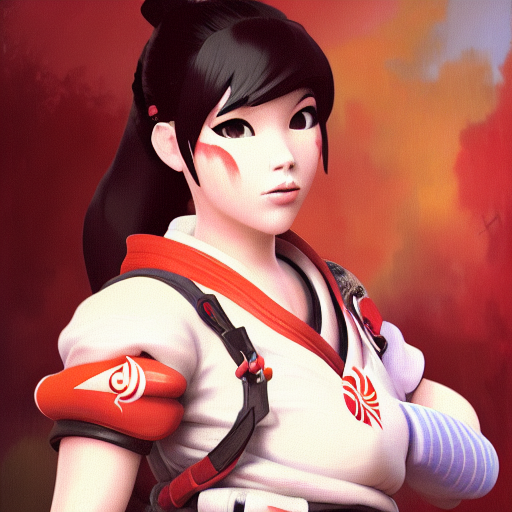

In [70]:
tune_lora_scale(pipe.unet, 0.8)
tune_lora_scale(pipe.text_encoder, 1.0)
torch.manual_seed(0)
prompt = "high quality portrait of game character <krk>, impressionist style from the 19th century, claude monet, oil painting"
pipe.safety_checker = None
image = pipe(prompt, num_inference_steps=50, guidance_scale=8.0).images[0]
image
